# How to use the gamma spectroscopy python tools

This notebook will serve as a quick introduction with examples on how to use the pre-made python tools for the lab course 'Gamma spectroscopy' using generated example datasets.

First, we import the usual packages we are going to need (Matplotlib and Numpy). 

In [1]:
from matplotlib import pyplot as plt
import numpy as np

## How to fit a peak

To begin with we need to import our data. Since the '.hst' format used is a version of a CSV file, we can use 'numpy.genfromtxt()' natively.

In [2]:
data_peak = np.genfromtxt("./Data/peak_example_data.hst")

Next, we need to assign channel numbers to each entry. This is easily done with 'numpy.arange()'.

In [3]:
data_channel = np.arange(len(data_peak))

With our data imported and arranged we can plot it. Since the data provided by the multi-channel analyser is essentially a histogram, we plot it as a bar chart using 'pyplot.bar()'. 

It is important to remember to set the modifier 'width = 1' so that each bar corresponds to one channel.

It should also be mentioned that 'pyplot.bar()' is significantly more computationally complex than 'pyplot.plot()', which means that for larger datasets the plotting process can take a while. Don't worry, it probably didn't crash. Give it some time.

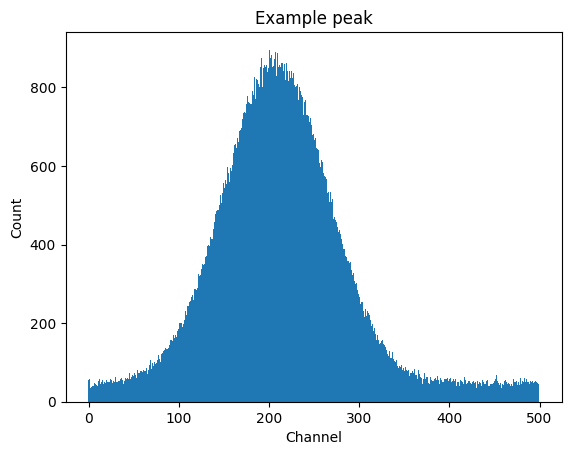

In [4]:
plt.bar(data_channel, data_peak, width = 1)
plt.title('Example peak')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

Now we are ready to fit our peak. Therefore we import the function 'fit_peak' from the 'gamma_tools' file.

This function allows us to easily perform a histogram fit on our data with a gaussian model function using Kafe2.

In [5]:
from gamma_tools import fit_peak

First let's try performing a fit without any options (don't forget to assign the results to a variable):

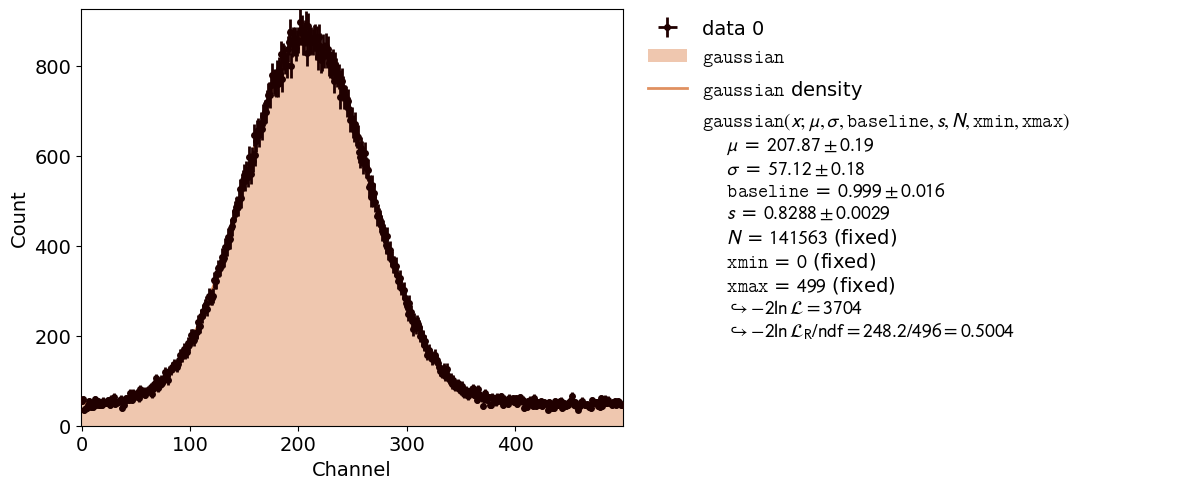

In [6]:
peak_fit_1 = fit_peak(data_channel, data_peak)

It can be benefitial or even necessary to restrict the scope of the fit. To do this you can simply specify the lower and upper bounds for the fit after the data. 

Additionally, you can label the fit using the modifier 'label' or manually set the axis labels (for example after energy callibration). You can also disable the visual output using the modifier 'showResult = False'. .

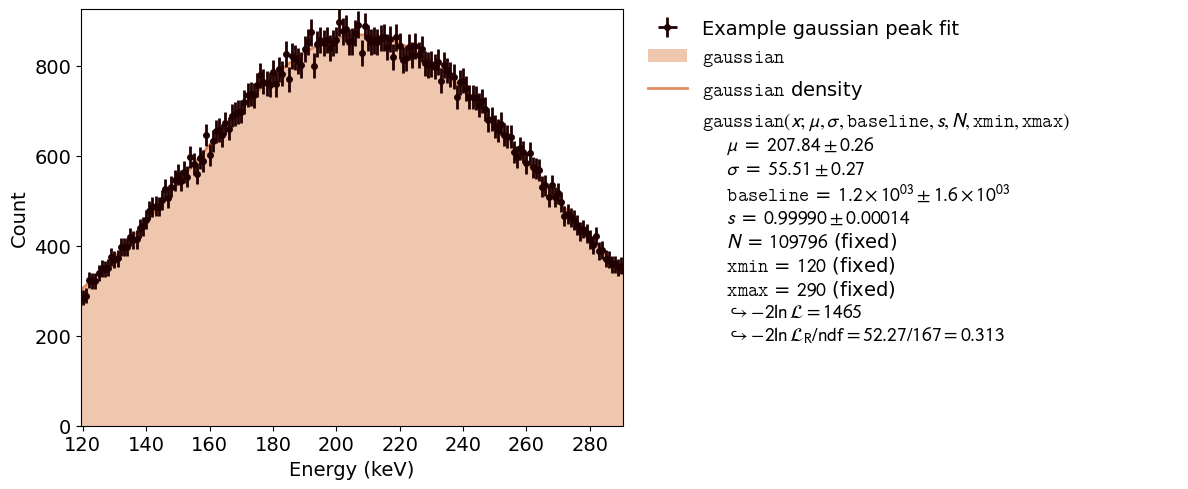

In [7]:
peak_fit_2 = fit_peak(data_channel, data_peak, 120, 290, label = 'Example gaussian peak fit', xlabel = 'Energy (keV)')

## How to fit a compton edge

The process for fitting a compton edge is largely analogue to that for fitting a peak. The main difference lies in the different model function. In this case a model function based around the complementary error function 'erfc' is used. 

Why an error function? As a rough approximation the compton continuum can be considered to follow a step function. However, this step function is effected by the finite energy resolution of the detector, just like the line of the photopeak is broadened into a Gaussian distribution. Therefore we have to consider the convolution of a step function with a gaussian distribution, which yields the error function.

In reality the compton continuum does obviously not follow a simple step function. On the contrary its specific form varies from case to case and can be very complicated. However a form correction is usually necessary to get acceptable results. In most cases this correction factor is determined phenomenologically. For the purposes of the lab course a quadratic form factor has been found to be a good match for the data.

Import and plot the data:

In [8]:
data_compton = np.genfromtxt("./Data/compton_example_data.hst")

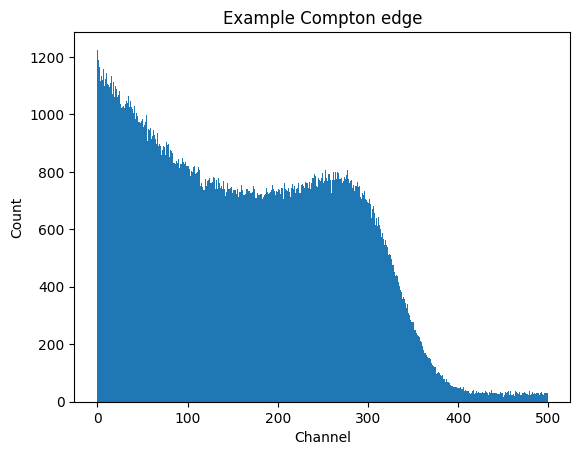

In [9]:
plt.bar(data_channel, data_compton, width = 1)
plt.title('Example Compton edge')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

Import the function 'fit_compton' and perform an initial 'naive' fit:

In [10]:
from gamma_tools import fit_compton

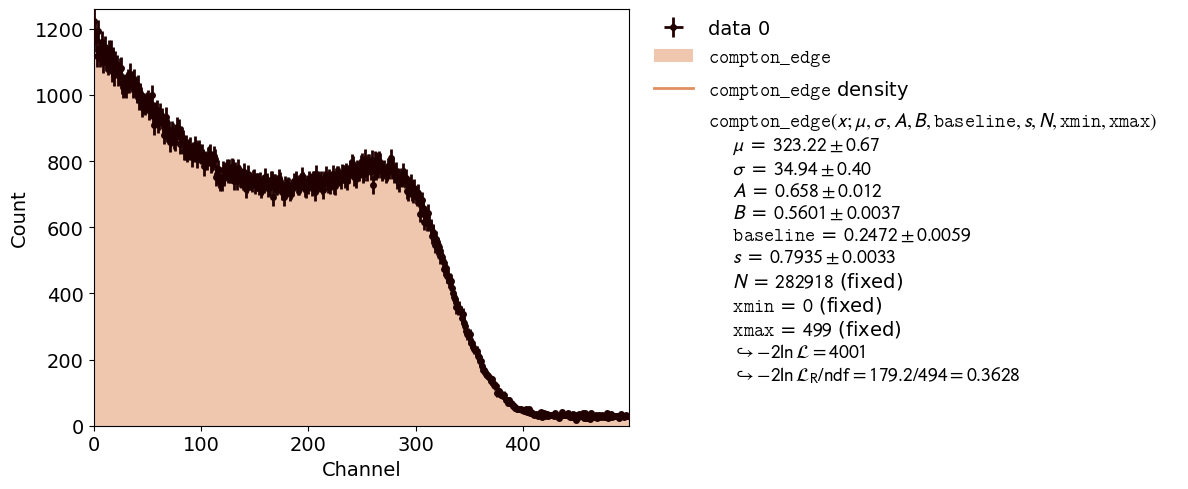

In [11]:
compton_fit_1 = fit_compton(data_channel, data_compton)

Just like with 'fit_peak' the fit range as well as further modifiers can be specified.

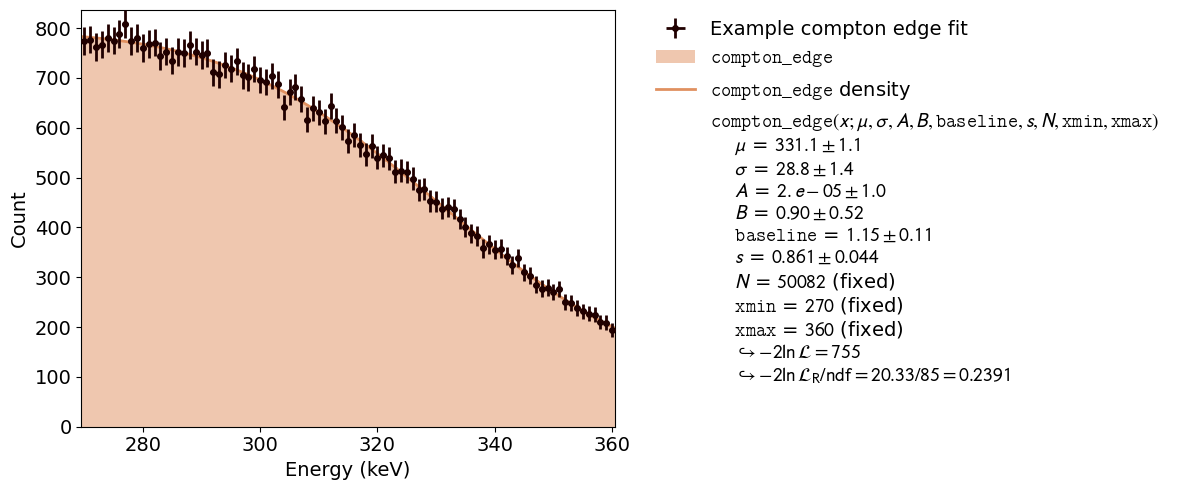

In [19]:
compton_fit_2 = fit_compton(data_channel, data_compton, 270, 360, label = 'Example compton edge fit', xlabel = 'Energy (keV)')